In [1]:
# importing libraries  
import numpy as np  
import matplotlib.pyplot as mtp  
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df['Genre'] = df['Genre'].map({'Male': 0,'Female': 1})
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [4]:
X = df.iloc[:,2:-1].values  #independent variable array
y = df.iloc[:,-1].values  #dependent variable vector
X

array([[ 19,  15],
       [ 21,  15],
       [ 20,  16],
       [ 23,  16],
       [ 31,  17],
       [ 22,  17],
       [ 35,  18],
       [ 23,  18],
       [ 64,  19],
       [ 30,  19],
       [ 67,  19],
       [ 35,  19],
       [ 58,  20],
       [ 24,  20],
       [ 37,  20],
       [ 22,  20],
       [ 35,  21],
       [ 20,  21],
       [ 52,  23],
       [ 35,  23],
       [ 35,  24],
       [ 25,  24],
       [ 46,  25],
       [ 31,  25],
       [ 54,  28],
       [ 29,  28],
       [ 45,  28],
       [ 35,  28],
       [ 40,  29],
       [ 23,  29],
       [ 60,  30],
       [ 21,  30],
       [ 53,  33],
       [ 18,  33],
       [ 49,  33],
       [ 21,  33],
       [ 42,  34],
       [ 30,  34],
       [ 36,  37],
       [ 20,  37],
       [ 65,  38],
       [ 24,  38],
       [ 48,  39],
       [ 31,  39],
       [ 49,  39],
       [ 24,  39],
       [ 50,  40],
       [ 27,  40],
       [ 29,  40],
       [ 31,  40],
       [ 49,  42],
       [ 33,  42],
       [ 31,

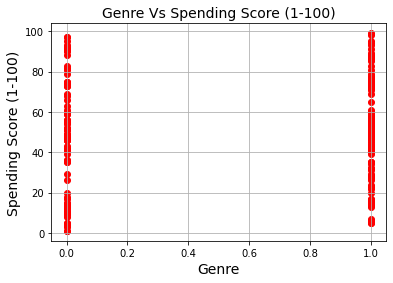

In [5]:
def plot(x,y):
    plt.scatter(df[x], df[y], color='red')
    plt.title(x+' Vs '+y, fontsize=14)
    plt.xlabel(x, fontsize=14)
    plt.ylabel(y, fontsize=14)
    plt.grid(True)
    plt.show()
    
plot('Genre','Spending Score (1-100)')

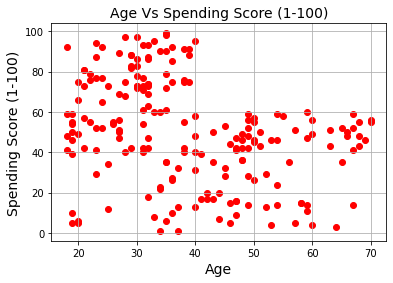

In [6]:
plot('Age','Spending Score (1-100)')

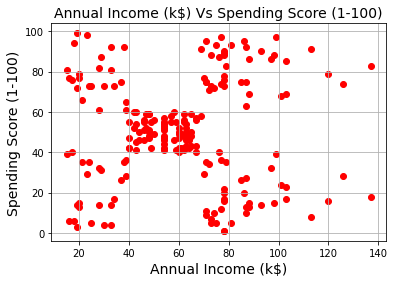

In [7]:
plot('Annual Income (k$)','Spending Score (1-100)')

<AxesSubplot:>

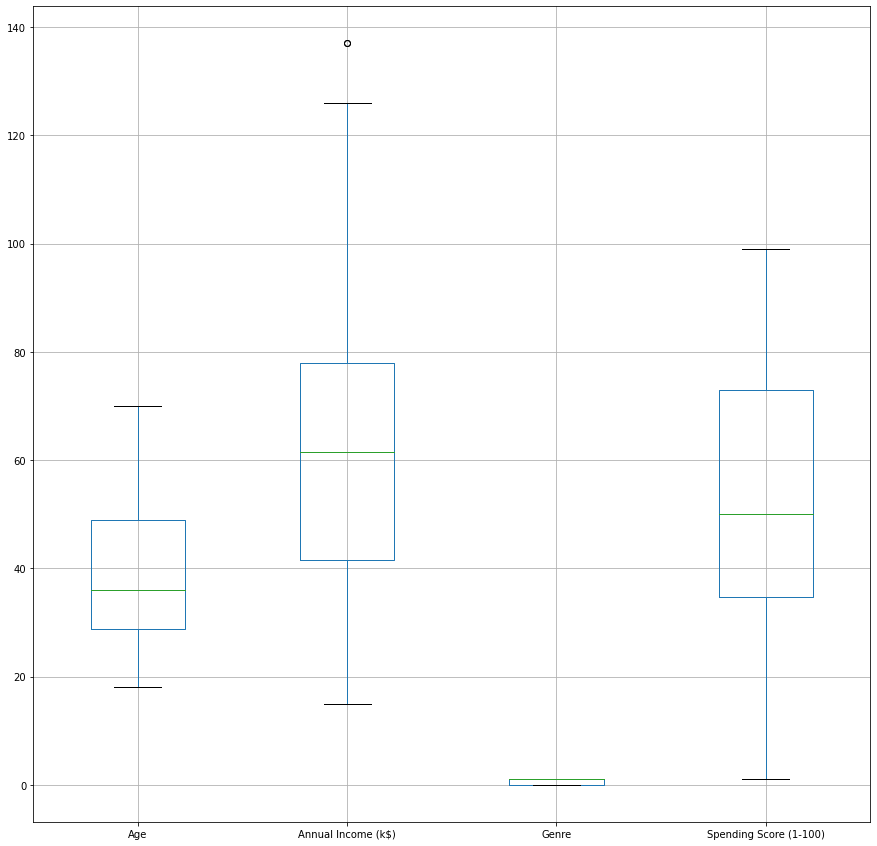

In [8]:
pd.plotting.boxplot_frame(df[df.columns.difference(['CustomerID'])],figsize=(15,15))

In [9]:
df.corrwith(df['Spending Score (1-100)'])

CustomerID                0.013835
Genre                     0.058109
Age                      -0.327227
Annual Income (k$)        0.009903
Spending Score (1-100)    1.000000
dtype: float64

# My Implementation

In [275]:
class GD_LinearRegression:
    def __init__(self):
        self.trained = False
        self.b = 0
    def train(self,x,y,alpha,iteration,ds_cost):
        self.trained = True
        m=len(x)
        
        self.b = np.zeros(x.shape[1])
        x_transpose = x.T
        it = []
        cost_l = []
        for epoch in range(iteration):
            h=x@(self.b)
            grad=(x_transpose@(h-y)) / m
            self.b=self.b-(alpha*grad)
            it.append(epoch)
            cost = self.cost(x,y)
            cost_l.append(cost)
            if cost <= ds_cost:
                break
        return it, cost_l, self.b
            
        
    def predict(self,x):
        if self.trained:
            h = x.dot(self.b)
            return h
        else:
            return print('Please train your model first')
        
    def cost(self,x,y):
        m=len(x)
        h = self.predict(x)
        return sum((h-y)**2)/m
    
    def plot(self,x,y,c_num):
        h = self.predict(x)
        plt.plot(x[:,c_num],h,c='r')
        plt.scatter(x[:,c_num],y,c='b')
        plt.show()
        
    def R2(self,x,y):
        h = self.predict(x)
        ymean = np.mean(y)
        ssres = sum((y-h)**2)
        sstot = sum((y-ymean)**2)
        r2 = 1-(ssres/sstot)
        return r2

In [352]:
X = df.iloc[:,2:-1].values
y = df.iloc[:,-1]

In [353]:
# X = (X - X.mean()) / X.std()
X = np.insert(X,0,np.ones(len(X)),axis=1)
# y = (y - y.mean()) / y.std()
print(X.shape)
y.shape

(200, 3)


(200,)

thetas:  [1.53350721 0.41220625 0.45614329]
Number of Itreation Before Break is : 999
Final Cost 953.63588447059
Spending Score For Male in 35 that has 44k as income : 36.03103054907116


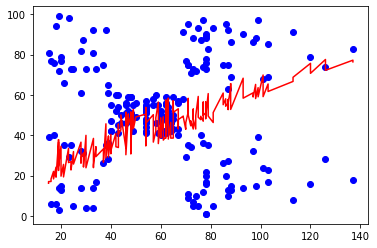

In [359]:
lin2 = GD_LinearRegression()
it,cost_l,thetas = lin2.train(X,y,0.0003,1000,0.317)
print('thetas: ',thetas)

print('Number of Itreation Before Break is :',it[-1])

print("Final Cost",cost_l[-1])

predict_point = thetas[0] + 35 * thetas[1] + 44 * thetas[2]
print('Spending Score For Male in 35 that has 44k as income :',predict_point)

lin2.plot(X,y,2)

In [360]:
lin2.R2(X,y)

-0.4372375881218211

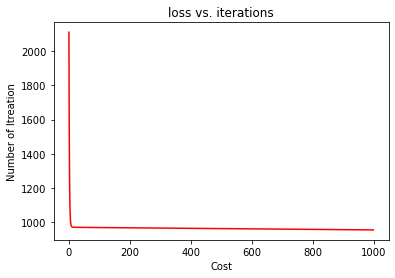

In [361]:
plt.plot(it,cost_l,c='r')
plt.ylabel("Number of Itreation")
plt.xlabel("Cost")
plt.title('loss vs. iterations')
plt.show()

# Normal Equation

In [181]:
x = df.iloc[:,2:-1].values
x = np.insert(x,0,np.ones(len(x)),axis=1)
y = df.iloc[:,-1]

theta = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y.T) # normal equation
print(theta)
h = x.dot(theta)
print(h)

[ 7.33478522e+01 -6.04787258e-01  5.74855922e-03]
[61.94312271 60.73354819 61.34408401 59.52972224 54.69717273 60.14025806
 52.28377226 59.54121936 34.75069034 55.31345711 32.93632857 52.28952082
 38.38516245 58.94792922 51.08569486 60.15750373 52.30101794 61.37282681
 42.03113167 52.31251506 52.31826362 58.3661362  45.67135234 54.74316121
 40.85029995 55.9699814  46.29338528 52.34125785 49.32307012 59.60445351
 37.23307353 60.81977658 41.48383001 62.65138403 43.90297904 60.83702226
 48.1422384  55.3996855  51.78820763 61.46480376 34.25512571 59.05140328
 44.54225765 54.82364104 43.9374704  59.05715184 43.3384317  57.24853863
 56.03896411 54.8293896  43.95471607 53.6313122  54.84663527 37.91259205
 43.35567737 45.17003915 42.75663868 31.87046803 57.28302998 41.55856128
 31.27717789 62.12132805 33.09728823 40.95952258 35.52218582 62.73761242
 47.61793098 32.49824953 62.13282516 54.27059081 31.29442357 45.2045305
 37.34804471 37.34804471 37.97582621 57.93380572 46.44284782 49.4667841
 59

In [182]:
predict_point = theta[0] + 35 * theta[1] + 44 * theta[2]
predict_point

52.43323480207317

# sklearn for multiple regression

# With Polynomial

In [114]:
X = df.iloc[:,2:-1].values
y = df.iloc[:,-1]

In [115]:
from sklearn.preprocessing import PolynomialFeatures

poly_regs= PolynomialFeatures(degree= 5)  
x_poly= poly_regs.fit_transform(X)
# x_poly = np.insert(x_poly,x_poly.shape[1],df['Genre'].values,axis=1)

In [116]:
x_poly

array([[1.00000000e+00, 1.90000000e+01, 1.50000000e+01, ...,
        1.21837500e+06, 9.61875000e+05, 7.59375000e+05],
       [1.00000000e+00, 2.10000000e+01, 1.50000000e+01, ...,
        1.48837500e+06, 1.06312500e+06, 7.59375000e+05],
       [1.00000000e+00, 2.00000000e+01, 1.60000000e+01, ...,
        1.63840000e+06, 1.31072000e+06, 1.04857600e+06],
       ...,
       [1.00000000e+00, 3.20000000e+01, 1.26000000e+02, ...,
        2.04838502e+09, 8.06551603e+09, 3.17579694e+10],
       [1.00000000e+00, 3.20000000e+01, 1.37000000e+02, ...,
        2.63306547e+09, 1.12728116e+10, 4.82617245e+10],
       [1.00000000e+00, 3.00000000e+01, 1.37000000e+02, ...,
        2.31421770e+09, 1.05682608e+10, 4.82617245e+10]])

In [117]:
from sklearn import linear_model
import statsmodels.api as sm

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x_poly, y)

# print('Intercept: \n', regr.intercept_)
# print('Coefficients: \n', regr.coef_)

# prediction with sklearn

# print ('Predicted Stock Index Price: \n', regr.predict([[New_1 ,New_2,New_3]]))

regr.score(x_poly,y)


0.44118790774160344

In [118]:
age = 35
income = 44
gender = 0
l = np.array([[age,income]])
poly_regs= PolynomialFeatures(degree= 5)  
to_predict= poly_regs.fit_transform(l)
print('Spending Score For Male in 35 that has 44k as income :',regr.predict(to_predict))

Spending Score For Male in 35 that has 44k as income : [47.94631886]


# Without Polynomial

In [325]:
X = df.iloc[:,2:-1].values
y = df.iloc[:,-1]

In [327]:
from sklearn import linear_model
import statsmodels.api as sm

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, y)

theta = regr.coef_
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', theta)

# prediction with sklearn

regr.score(X,y)


Intercept: 
 73.34785222186397
Coefficients: 
 [-0.60478726  0.00574856]


0.10711158828485168

In [328]:
# prediction with sklearn
age = 35
income = 44
gender = 0
to_predict = np.array([[age,income]])
print('Spending Score For Male in 35 that has 44k as income :',regr.predict(to_predict))

Spending Score For Male in 35 that has 44k as income : [52.4332348]


In [329]:

predict_point = 35 * theta[0] + 44 * theta[1] + regr.intercept_
predict_point

52.43323480207328